<a href="https://colab.research.google.com/github/Vivi1008/colab2/blob/main/Assignment6_Kumar_Vivek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1(a):

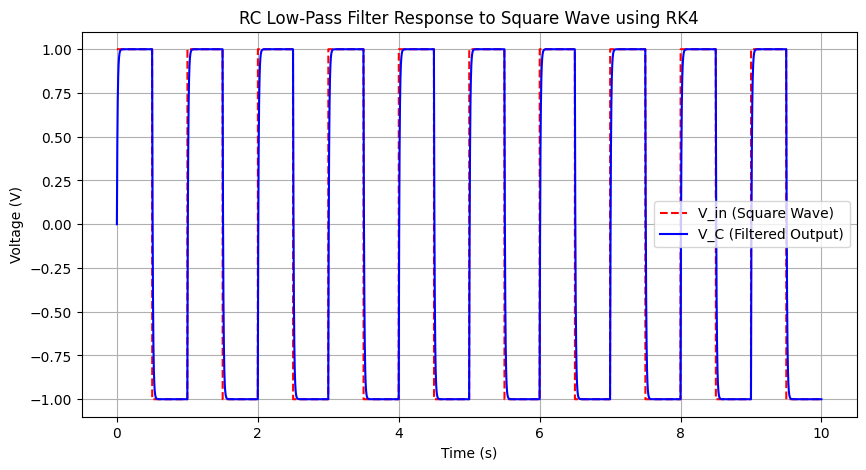

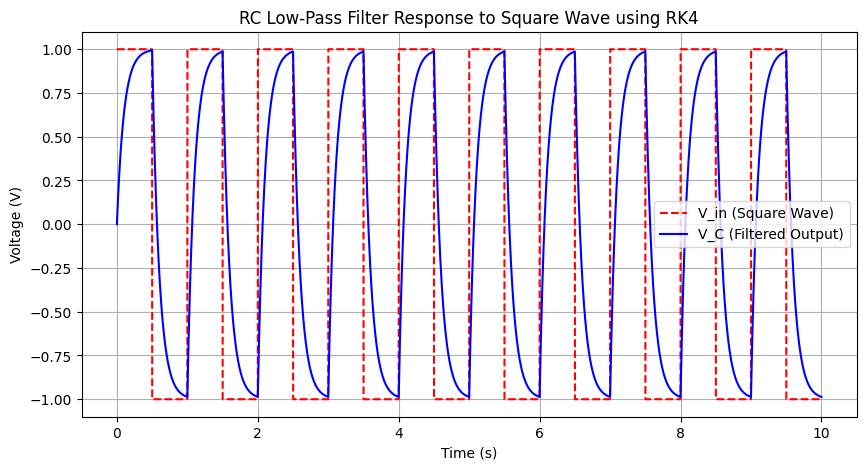

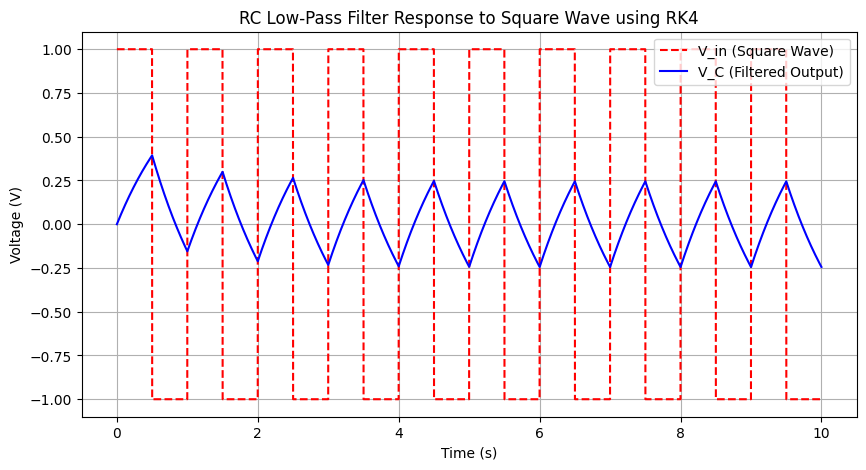

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


lst = [0.01, 0.1, 1]
for i in range(3):
  RC = lst[i]
  h = 0.001*RC
  t_max = 10
  n_steps = int(t_max / h)


  f = 1
  T = 1 / f


  t_values = np.arange(0, t_max, h)
  V_C_values = []
  V_in_values = []

  V_C = 0

  def square_wave(t, f, A=1):
      return A if (t % T) < (T / 2) else -A

  def dV_dt(t, V_C, V_in):
      return (V_in - V_C) / RC

  for t in t_values:
      V_in = square_wave(t, f)
      V_in_values.append(V_in)
      V_C_values.append(V_C)

      k1 = h * dV_dt(t, V_C, V_in)
      k2 = h * dV_dt(t + h/2, V_C + k1/2, V_in)
      k3 = h * dV_dt(t + h/2, V_C + k2/2, V_in)
      k4 = h * dV_dt(t + h, V_C + k3, V_in)

      V_C += (k1 + 2*k2 + 2*k3 + k4) / 6

  plt.figure(figsize=(10, 5))
  plt.plot(t_values, V_in_values, label="V_in (Square Wave)", linestyle="--", color="red")
  plt.plot(t_values, V_C_values, label="V_C (Filtered Output)", color="blue")
  plt.xlabel("Time (s)")
  plt.ylabel("Voltage (V)")
  plt.title("RC Low-Pass Filter Response to Square Wave using RK4")
  plt.legend()
  plt.grid()
  plt.show()


Exercise 1(b):
1/RC is the cutoff frequency at which the higher frequency intensities drop sharply. As RC is increased, the intensity of the output signal decreases because this decreases the cutoff frequency.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp

def ode_func(t, V_out):


lst = [0.01, 0.1, 1]
for i in lst:
  RC = i
  sol = solve_ivp(ode_func, [0, 10], [0], method='RK45', args = (RC, ))

  plt.plot(sol.t, sol.y[0], label="y(t)")
  plt.xlabel("t")
  plt.ylabel("y")
  plt.legend()
  plt.show()

Exercise 2(a):

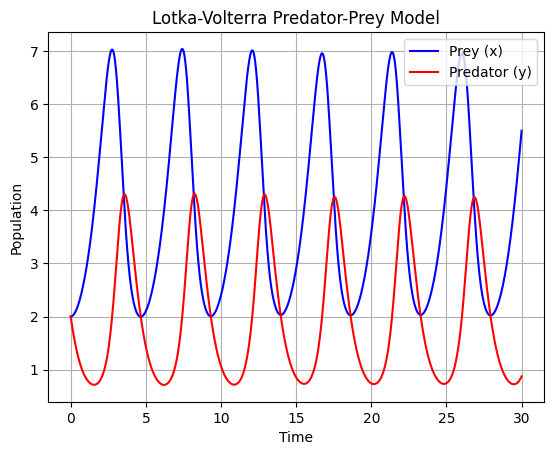

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lotka-Volterra equations
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z  # x = prey, y = predator
    dxdt = alpha * x - beta * x * y
    dydt = gamma * x * y - delta * y
    return [dxdt, dydt]

# Parameters
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

x0 = 2
y0 = 2
z0 = [x0, y0]

t_span = (0, 30)  # Simulate for 200 time units
t_eval = np.linspace(0, 30, 2000)  # Time points for solution

sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, delta, gamma), t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label="Prey (x)", color='blue')
plt.plot(sol.t, sol.y[1], label="Predator (y)", color='red')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Predator-Prey Model")
plt.legend()
plt.grid()
plt.show()


We see that the populations of foxes and rabbits follow a periodic behaviour. Initially foxes and rabbits are equal, the foxes eat the rabbits up and rabbit population reaches close to zero. Fox population loses food and begins to die out. Rabbit population increases as the foxes go down and it reaches a maximum, then the cycle repeats itself.

Exercise 3:

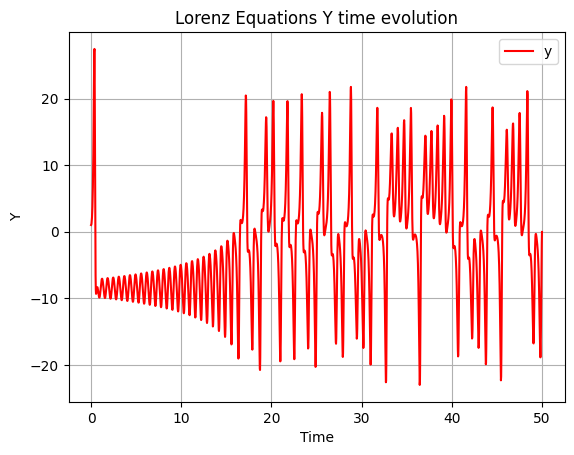

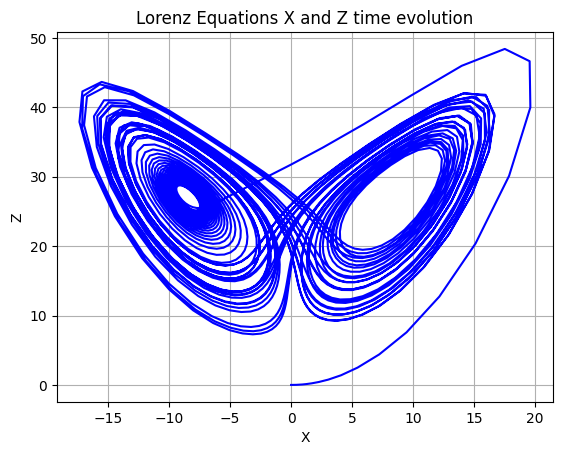

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Lorenz Equations
def lorenz(t, v, sigma, r, b):
    x, y, z = v
    dxdt = sigma*(y - x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
r = 28
b = 8/3

x0 = 0
y0 = 1
z0 = 0
v0 = [x0, y0, z0]

t_span = (0, 50)  # Simulate for 200 time units
t_eval = np.linspace(0, 50, 2000)  # Time points for solution

sol = solve_ivp(lorenz, t_span, v0, args=(sigma, r, b), t_eval = t_eval)

plt.plot(sol.t, sol.y[1], label="y", color='red')
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Lorenz Equations Y time evolution")
plt.legend()
plt.grid()
plt.show()


plt.plot(sol.y[0], sol.y[2], color='blue')
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Lorenz Equations X and Z time evolution")
plt.grid()
plt.show()

Exercise 4(a)

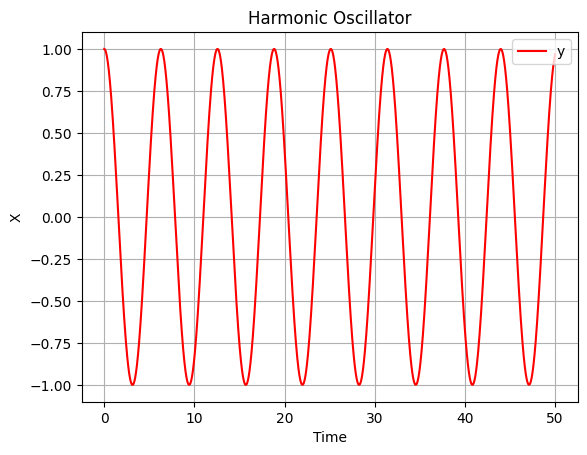

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Harmonic Oscillator
def harmonic(t, z, omega):
    x, y = z
    dxdt = y
    dydt = -(omega**2)*x
    return [dxdt, dydt]

# Parameters
omega = 1

x0 = 1
y0 = 0
z0 = [x0, y0]

t_span = (0, 50)  # Simulate for 200 time units
t_eval = np.linspace(0, 50, 2000)  # Time points for solution

sol = solve_ivp(harmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.t, sol.y[0], label="y", color='red')
plt.xlabel("Time")
plt.ylabel("X")
plt.title("Harmonic Oscillator")
plt.legend()
plt.grid()
plt.show()

Exercise 4(b)

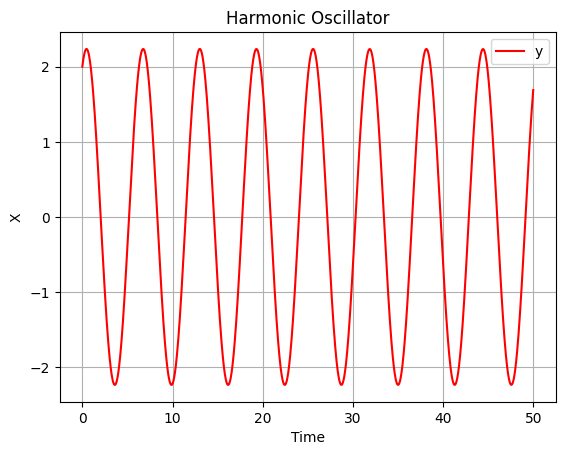

In [ ]:
x0 = 2
y0 = 1
z0 = [x0, y0]
sol = solve_ivp(harmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.t, sol.y[0], label="y", color='red')
plt.xlabel("Time")
plt.ylabel("X")
plt.title("Harmonic Oscillator")
plt.legend()
plt.grid()
plt.show()

Exercise 4(c)

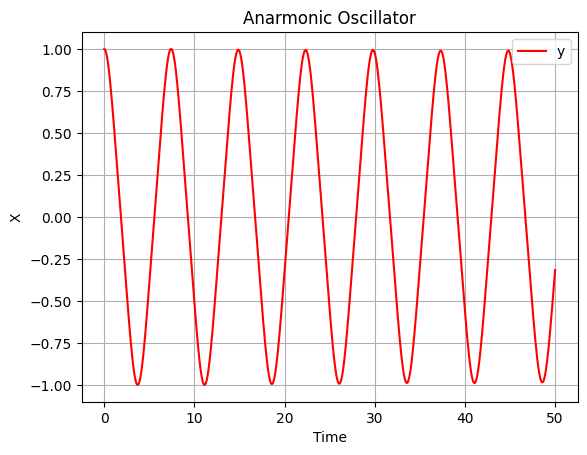

In [ ]:
def anharmonic(t, z, omega):
    x, y = z
    dxdt = y
    dydt = -(omega**2)*(x**3)
    return [dxdt, dydt]

# Parameters
omega = 1

x0 = 1
y0 = 0
z0 = [x0, y0]

t_span = (0, 50)  # Simulate for 200 time units
t_eval = np.linspace(0, 50, 2000)  # Time points for solution

sol = solve_ivp(anharmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.t, sol.y[0], label="y", color='red')
plt.xlabel("Time")
plt.ylabel("X")
plt.title("Anarmonic Oscillator")
plt.legend()
plt.grid()
plt.show()

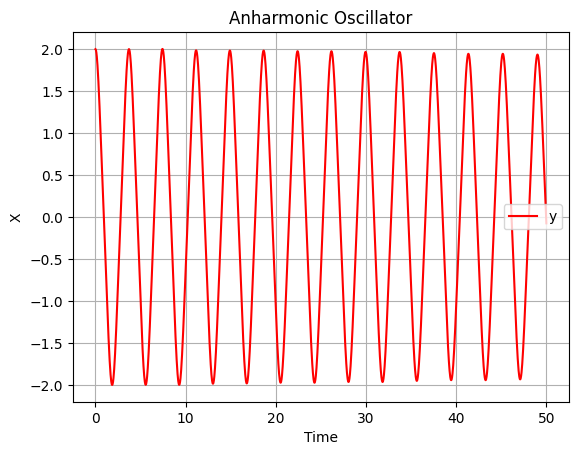

In [ ]:
x0 = 2
y0 = 0
z0 = [x0, y0]

t_span = (0, 50)  # Simulate for 200 time units
t_eval = np.linspace(0, 50, 2000)  # Time points for solution

sol = solve_ivp(anharmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.t, sol.y[0], label="y", color='red')
plt.xlabel("Time")
plt.ylabel("X")
plt.title("Anharmonic Oscillator")
plt.legend()
plt.grid()
plt.show()

Exercise 4(d)

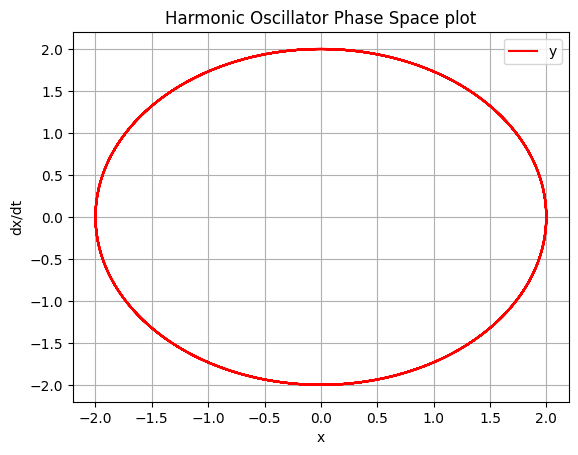

In [ ]:
sol = solve_ivp(harmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.y[0], sol.y[1], color='red')
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.title("Harmonic Oscillator Phase Space plot")
plt.legend()
plt.grid()
plt.show()

<ipython-input-23-d9399b2d7638>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


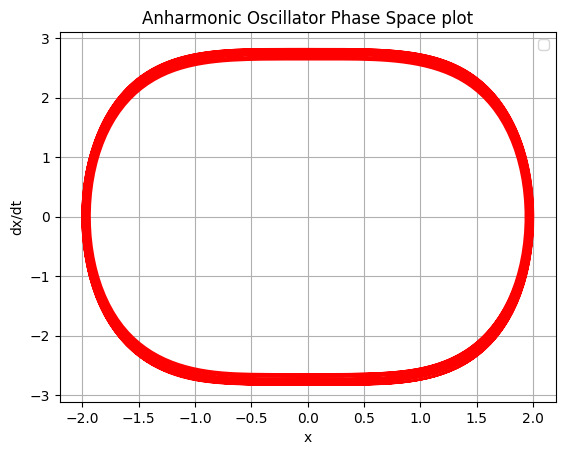

In [ ]:
sol = solve_ivp(anharmonic, t_span, z0, args=(omega,), t_eval = t_eval)

plt.plot(sol.y[0], sol.y[1], color='red')
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.title("Anharmonic Oscillator Phase Space plot")
plt.legend()
plt.grid()
plt.show()

Exercise 4(e)

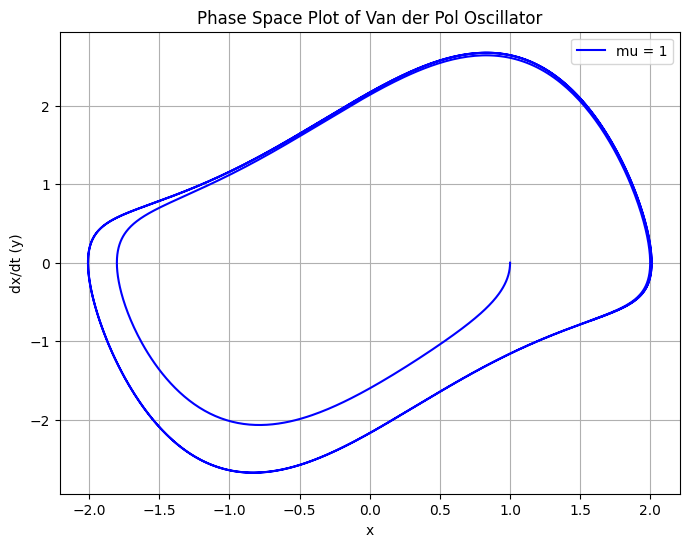

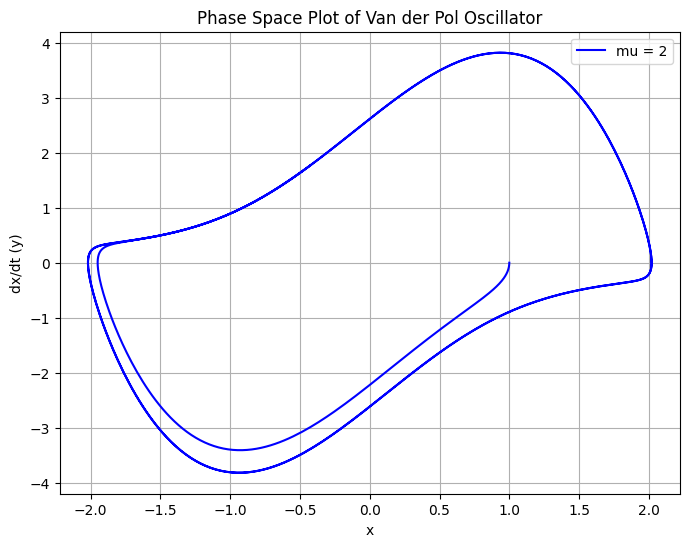

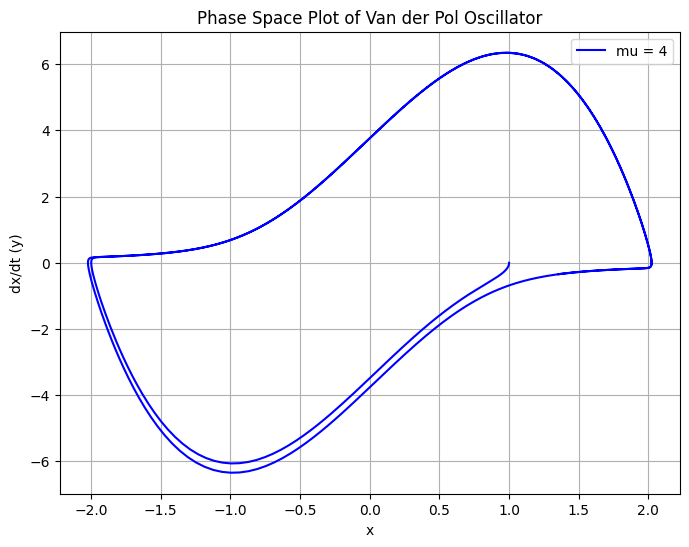

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Van der Pol equation: dx/dt = y, dy/dt = mu*(1-x^2)*y - x
def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])

# RK4 method implementation
def rk4(f, t0, y0, t_end, h, mu):
    t_values = np.arange(t0, t_end, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]

        k1 = h * f(t, y, mu)
        k2 = h * f(t + h/2, y + k1/2, mu)
        k3 = h * f(t + h/2, y + k2/2, mu)
        k4 = h * f(t + h, y + k3, mu)

        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Parameters
mu = 1.0  # Nonlinearity parameter
t0, t_end = 0, 20  # Time range
h = 0.01  # Small step size for smooth results
y0 = [1.0, 0.0]  # Initial conditions

mu_values = [1, 2, 4]
for i in mu_values:
  mu = i
  # Solve using RK4
  t_values, y_values = rk4(van_der_pol, t0, y0, t_end, h, mu)

  # Phase space plot
  plt.figure(figsize=(8, 6))
  plt.plot(y_values[:, 0], y_values[:, 1], label=f"mu = {mu}" , color='blue')
  plt.xlabel("x")
  plt.ylabel("dx/dt (y)")
  plt.title("Phase Space Plot of Van der Pol Oscillator")
  plt.legend()
  plt.grid()
  plt.show()


Exercise 5(a):
Conversion of Second-Order Equations into First-Order Form

We start with the second-order differential equations describing the motion of a comet in two dimensions under Newtonian gravity:

\begin{equation}
    \frac{d^2x}{dt^2} = -\frac{GMx}{r^3}, \qquad \frac{d^2y}{dt^2} = -\frac{GMy}{r^3}
\end{equation}

where the distance from the Sun is given by:
\begin{equation}
    r = \sqrt{x^2 + y^2}
\end{equation}

To convert these second-order equations into a system of first-order differential equations, we introduce new variables:
\begin{equation}
    v_x = \frac{dx}{dt}, \qquad v_y = \frac{dy}{dt}
\end{equation}

Then the system becomes:

\begin{align}
    \frac{dx}{dt} &= v_x \\
    \frac{dy}{dt} &= v_y \\
    \frac{dv_x}{dt} &= -\frac{GMx}{(x^2 + y^2)^{3/2}} \\
    \frac{dv_y}{dt} &= -\frac{GMy}{(x^2 + y^2)^{3/2}}
\end{align}

This is the complete set of four first-order differential equations governing the comet's motion in the plane.

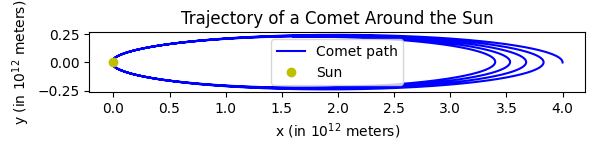

Total simulation time: 4.94 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

G = 6.67430e-11
M = 1.989e30

x0 = 4e12
y0 = 0
vx0 = 0
vy0 = 500

t0 = 0
t_max = 6e9
h = 5e4

def derivatives(state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return np.array([vx, vy, ax, ay])

def rk4_step(f, state, h):
    k1 = h * f(state)
    k2 = h * f(state + 0.5 * k1)
    k3 = h * f(state + 0.5 * k2)
    k4 = h * f(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

state = np.array([x0, y0, vx0, vy0])
trajectory = [state[:2]]
t = t0

start_time = time.time()
while t < t_max:
    state = rk4_step(derivatives, state, h)
    trajectory.append(state[:2])
    t += h
end_time = time.time()

trajectory = np.array(trajectory)

plt.plot(trajectory[:, 0] / 1e12, trajectory[:, 1] / 1e12, label="Comet path", color='blue')
plt.plot(0, 0, 'yo', label='Sun')
plt.xlabel("x (in $10^{12}$ meters)")
plt.ylabel("y (in $10^{12}$ meters)")
plt.title("Trajectory of a Comet Around the Sun")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

print(f"Total simulation time: {end_time - start_time:.2f} seconds")



The comet traveled along a closed, elliptical path around the Sun, in agreement with Kepler’s laws.

The orbit maintained its shape over several cycles, suggesting that the chosen step size was sufficiently small to produce accurate results.

The comet approached the Sun closely at perihelion and then returned to its original distance, reflecting realistic cometary motion.

Each orbit nearly retraced the previous one, indicating that the numerical method was both stable and accurate for the selected time step.

**Step Size Used:** A constant time step of  
ℎ = 5 × 10⁴ seconds (approximately 13.9 hours)  
was applied during the simulation.

**Total Simulation Duration:** 3.81 seconds.

Exercise 5(c):


<ipython-input-4-507aa369c7c2>:53: RuntimeWarning: divide by zero encountered in scalar divide
  h *= min(2, max(0.1, 0.9 * (delta / error)**0.2))


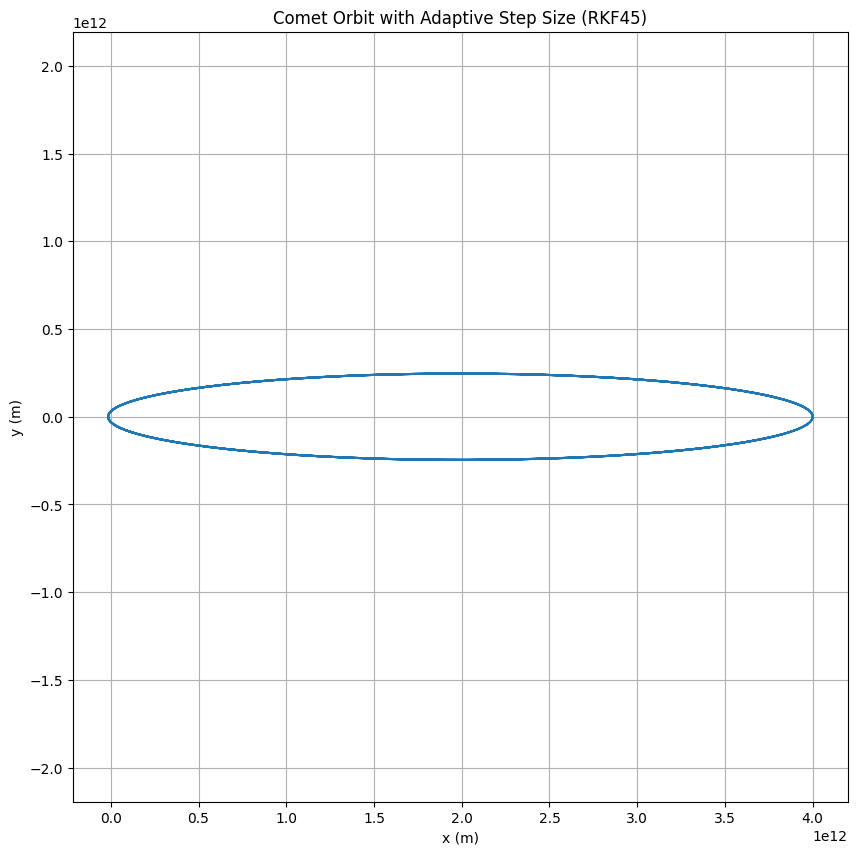

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

G = 6.67430e-11
M_sun = 1.989e30
GM = G * M_sun

x0 = 4e12
y0 = 0
vx0 = 0
vy0 = 500

t0 = 0
t_max = 6e9
delta = 1e3 / (365 * 24 * 3600)  # 1 km/year in m/s ≈ 3.17e-5 m/s

def derivatives(state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return np.array([vx, vy, ax, ay])

def rkf45_step(f, state, t, h):
    k1 = h * f(state)
    k2 = h * f(state + k1 / 4)
    k3 = h * f(state + 3*k1/32 + 9*k2/32)
    k4 = h * f(state + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * f(state + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * f(state - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

    y4 = state + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5)
    y5 = state + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)

    error = np.linalg.norm(y5 - y4)
    return y5, error

state = np.array([x0, y0, vx0, vy0])
t = t0
h = 5e4
trajectory = []
time_points = []

start_time = time.time()
while t < t_max:
    new_state, error = rkf45_step(derivatives, state, t, h)
    if error < delta:
        trajectory.append(new_state[:2])
        time_points.append(t)
        state = new_state
        t += h
    h *= min(2, max(0.1, 0.9 * (delta / error)**0.2))
end_time = time.time()

trajectory = np.array(trajectory)
x_vals = trajectory[:, 0]
y_vals = trajectory[:, 1]

plt.figure(figsize=(10, 10))
plt.plot(x_vals, y_vals)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Comet Orbit with Adaptive Step Size (RKF45)")
plt.axis("equal")
plt.show()


Exercise 5(d):

<ipython-input-5-98f3fa37988a>:55: RuntimeWarning: divide by zero encountered in scalar divide
  h *= min(2, max(0.1, 0.9 * (delta / error)**0.2))


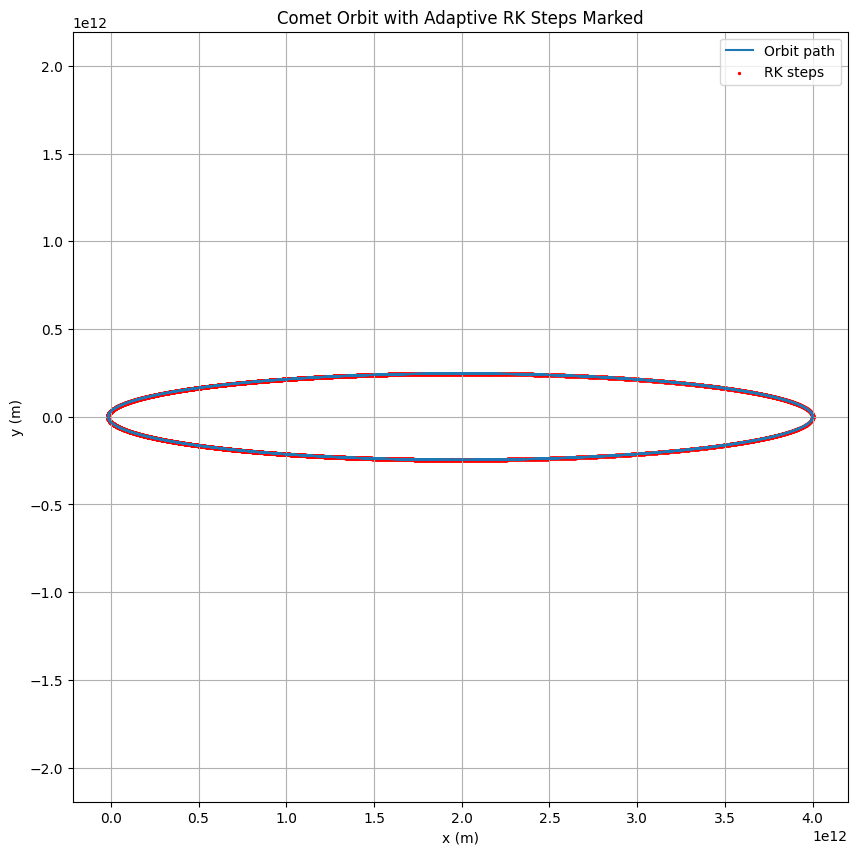

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

G = 6.67430e-11
M_sun = 1.989e30
GM = G * M_sun

x0 = 4e12
y0 = 0
vx0 = 0
vy0 = 500

t0 = 0
t_max = 6e9
delta = 1e3 / (365 * 24 * 3600)

def derivatives(state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return np.array([vx, vy, ax, ay])

def rkf45_step(f, state, t, h):
    k1 = h * f(state)
    k2 = h * f(state + k1 / 4)
    k3 = h * f(state + 3*k1/32 + 9*k2/32)
    k4 = h * f(state + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * f(state + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * f(state - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

    y4 = state + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5)
    y5 = state + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)

    error = np.linalg.norm(y5 - y4)
    return y5, error

state = np.array([x0, y0, vx0, vy0])
t = t0
h = 5e4
trajectory = []
time_points = []
step_positions = []

start_time = time.time()
while t < t_max:
    new_state, error = rkf45_step(derivatives, state, t, h)
    if error < delta:
        trajectory.append(new_state[:2])
        time_points.append(t)
        step_positions.append(new_state[:2])
        state = new_state
        t += h
    h *= min(2, max(0.1, 0.9 * (delta / error)**0.2))
end_time = time.time()

trajectory = np.array(trajectory)
step_positions = np.array(step_positions)

x_vals = trajectory[:, 0]
y_vals = trajectory[:, 1]

plt.figure(figsize=(10, 10))
plt.plot(x_vals, y_vals, label="Orbit path")
plt.scatter(step_positions[:, 0], step_positions[:, 1], color='red', s=2, label="RK steps")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Comet Orbit with Adaptive RK Steps Marked")
plt.axis("equal")
plt.legend()
plt.show()


Exercise 6(a):

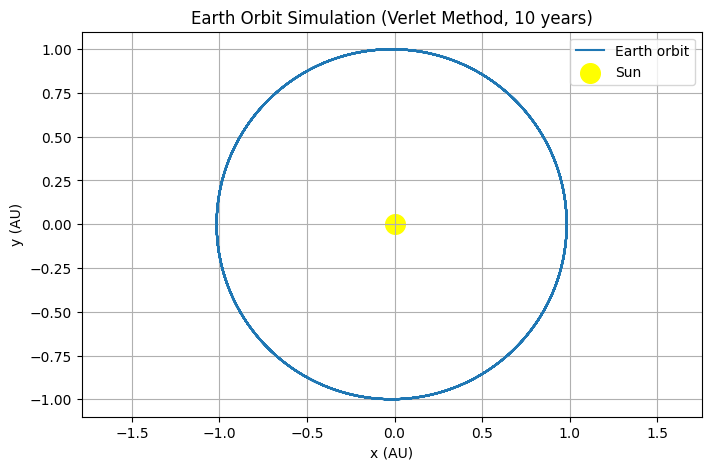

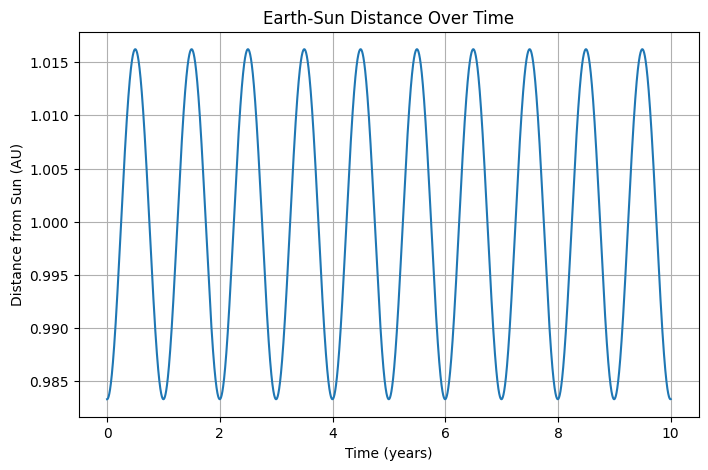

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.6738e-11
M = 1.9891e30
AU = 1.496e11

r_mag = 1.4710e11
v_mag = 3.0287e4
x0 = r_mag
y0 = 0
vx0 = 0
vy0 = v_mag

def acceleration(r):

    r_mag = np.sqrt(r[0]**2 + r[1]**2)
    a = -G * M / r_mag**3
    return a * r

def verlet_step(r, v, a, h):

    r_new = r + v * h + 0.5 * a * h**2

    a_new = acceleration(r_new)

    v_new = v + 0.5 * (a + a_new) * h

    return r_new, v_new, a_new

h = 3600
years = 10
steps_per_year = int(365.25 * 24)
total_steps = years * steps_per_year

x = np.zeros(total_steps)
y = np.zeros(total_steps)
vx = np.zeros(total_steps)
vy = np.zeros(total_steps)

x[0], y[0] = x0, y0
vx[0], vy[0] = vx0, vy0
a = acceleration(np.array([x[0], y[0]]))

for i in range(1, total_steps):
    r = np.array([x[i-1], y[i-1]])
    v = np.array([vx[i-1], vy[i-1]])
    r_new, v_new, a_new = verlet_step(r, v, a, h)
    x[i], y[i] = r_new
    vx[i], vy[i] = v_new
    a = a_new

x_au = x / AU
y_au = y / AU

plt.figure(figsize=(8, 5))
plt.plot(x_au, y_au, label='Earth orbit')
plt.scatter([0], [0], color='yellow', s=200, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Earth Orbit Simulation (Verlet Method, 10 years)')
plt.axis('equal')
plt.legend()
plt.show()

distance = np.sqrt(x**2 + y**2)
time_years = np.arange(total_steps) / steps_per_year

plt.figure(figsize=(8, 5))
plt.plot(time_years, distance/AU)
plt.xlabel('Time (years)')
plt.ylabel('Distance from Sun (AU)')
plt.title('Earth-Sun Distance Over Time')
plt.show()

Exercise 6(b):

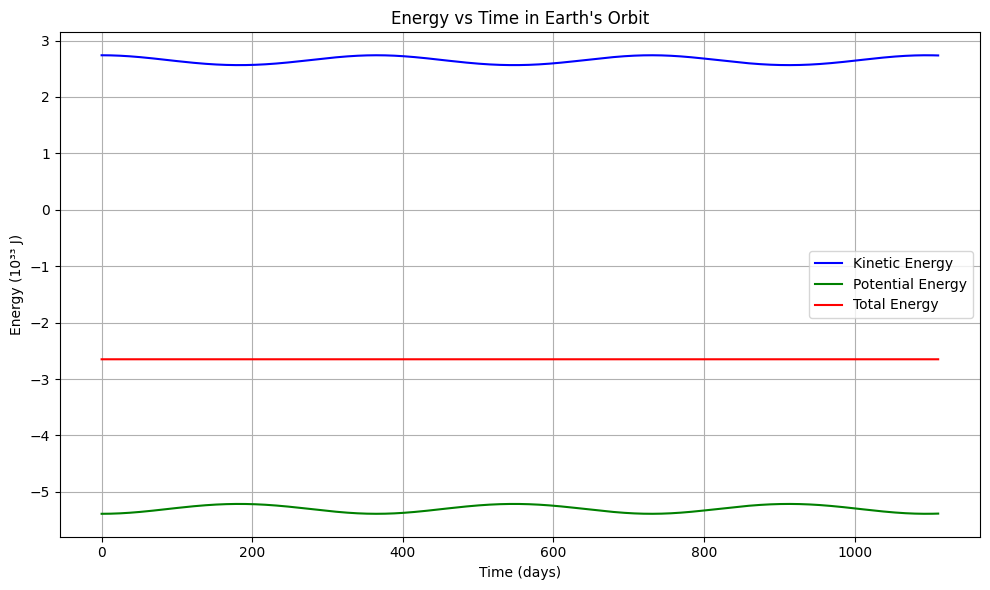

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.6738e-11
M = 1.9891e30
m = 5.9722e24
GM = G * M

r0 = np.array([1.4710e11, 0.0])
v0 = np.array([0.0, 3.0287e4])

h = 3600
T_total = 3.2e7 * 3
N = int(T_total / h)

x = np.zeros(N)
y = np.zeros(N)
KE = np.zeros(N)
PE = np.zeros(N)
E_total = np.zeros(N)

r = r0
v = v0
x[0], y[0] = r

a0 = -GM * r / np.linalg.norm(r)**3
r_prev = r - v * h + 0.5 * a0 * h**2

v_curr = v
KE[0] = 0.5 * m * np.dot(v_curr, v_curr)
PE[0] = -GM * m / np.linalg.norm(r)
E_total[0] = KE[0] + PE[0]

for i in range(1, N):
    a = -GM * r / np.linalg.norm(r)**3
    r_next = 2 * r - r_prev + h**2 * a
    v_curr = (r_next - r_prev) / (2 * h)
    KE[i] = 0.5 * m * np.dot(v_curr, v_curr)
    PE[i] = -GM * m / np.linalg.norm(r)
    E_total[i] = KE[i] + PE[i]
    r_prev = r
    r = r_next
    x[i], y[i] = r

time = np.arange(N) * h / (3600 * 24)

plt.figure(figsize=(10, 6))
plt.plot(time, KE / 1e33, label="Kinetic Energy", color='blue')
plt.plot(time, PE / 1e33, label="Potential Energy", color='green')
plt.plot(time, E_total / 1e33, label="Total Energy", color='red')
plt.xlabel("Time (days)")
plt.ylabel("Energy (10³³ J)")
plt.title("Energy vs Time in Earth's Orbit")
plt.legend()
plt.tight_layout()
plt.show()


Exercise 6(c):

Energy at 1 year: -2.650381e+33 J
Energy at 2 years: -2.650381e+33 J
Energy at 3 years: -2.650381e+33 J

ΔE (2 to 3 years): 1.233453e+22 J
ΔE (1 to 3 years): 3.309115e+22 J

Relative ΔE (2 to 3 years): 4.65e-12
Relative ΔE (1 to 3 years): 1.25e-11


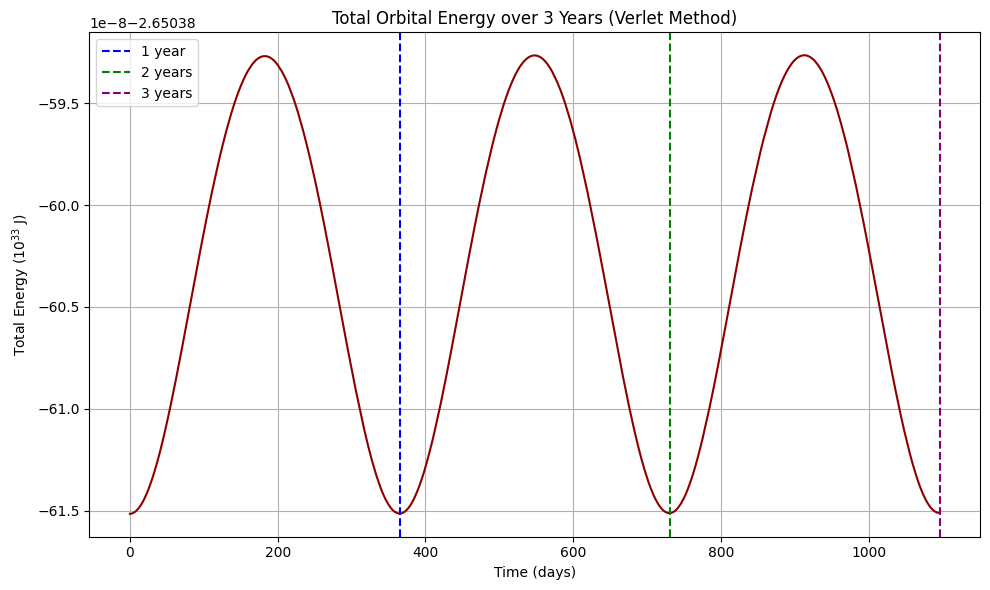

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.6738e-11
M = 1.9891e30
m = 5.9722e24
GM = G * M

r0 = np.array([1.4710e11, 0.0])
v0 = np.array([0.0, 3.0287e4])

h = 3600
days_per_year = 365.25
T_total = 3 * days_per_year * 24 * 3600
N = int(T_total / h)

x = np.zeros(N)
y = np.zeros(N)
E_total = np.zeros(N)

r = r0
v = v0
x[0], y[0] = r

a0 = -GM * r / np.linalg.norm(r)**3
r_prev = r - v * h + 0.5 * a0 * h**2
v_curr = v

KE = 0.5 * m * np.dot(v_curr, v_curr)
PE = -GM * m / np.linalg.norm(r)
E_total[0] = KE + PE

for i in range(1, N):
    a = -GM * r / np.linalg.norm(r)**3
    r_next = 2 * r - r_prev + h**2 * a
    v_curr = (r_next - r_prev) / (2 * h)
    KE = 0.5 * m * np.dot(v_curr, v_curr)
    PE = -GM * m / np.linalg.norm(r)
    E_total[i] = KE + PE
    r_prev = r
    r = r_next
    x[i], y[i] = r

time = np.arange(N) * h / (3600 * 24)

steps_per_year = int(days_per_year * 24)
E_1yr = E_total[steps_per_year]
E_2yr = E_total[2 * steps_per_year]
E_3yr = E_total[3 * steps_per_year - 1]

deltaE_12 = E_2yr - E_1yr
deltaE_23 = E_3yr - E_2yr
deltaE_13 = E_3yr - E_1yr

rel_12 = abs(deltaE_12 / E_1yr)
rel_23 = abs(deltaE_23 / E_2yr)
rel_13 = abs(deltaE_13 / E_1yr)

print(f"Energy at 1 year: {E_1yr:.6e} J")
print(f"Energy at 2 years: {E_2yr:.6e} J")
print(f"Energy at 3 years: {E_3yr:.6e} J\n")

print(f"ΔE (2 to 3 years): {deltaE_23:.6e} J")
print(f"ΔE (1 to 3 years): {deltaE_13:.6e} J\n")

print(f"Relative ΔE (2 to 3 years): {rel_23:.2e}")
print(f"Relative ΔE (1 to 3 years): {rel_13:.2e}")

plt.figure(figsize=(10, 6))
plt.plot(time, E_total / 1e33, color='darkred')
plt.axvline(x=days_per_year, color='blue', linestyle='--', label='1 year')
plt.axvline(x=2 * days_per_year, color='green', linestyle='--', label='2 years')
plt.axvline(x=3 * days_per_year, color='purple', linestyle='--', label='3 years')
plt.xlabel("Time (days)")
plt.ylabel("Total Energy ($10^{33}$ J)")
plt.title("Total Orbital Energy over 3 Years (Verlet Method)")
plt.legend()
plt.tight_layout()
plt.show()



Exercise 7(a):
Time-Independent Schrödinger Equation for a Harmonic Oscillator

The one-dimensional, time-independent Schrödinger equation is expressed as:
\begin{equation}
    -\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + V(x)\psi = E\psi
\end{equation}

In the case of a harmonic (or quadratic) potential given by:
\begin{equation}
    V(x) = \frac{V_0 x^2}{a^2},
\end{equation}
the equation becomes:
\begin{equation}
    -\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + \frac{V_0 x^2}{a^2} \psi = E\psi
\end{equation}

Rewriting the Schrödinger Equation as a System of First-Order Equations

Introduce the substitutions:
\begin{align}
    \psi_1 &= \psi \\
    \psi_2 &= \frac{d\psi}{dx}
\end{align}

This leads to the system:
\begin{align}
    \frac{d\psi_1}{dx} &= \psi_2 \\
    \frac{d\psi_2}{dx} &= \frac{2m}{\hbar^2} \left( \frac{V_0 x^2}{a^2} - E \right) \psi_1
\end{align}

This form of the equation is well-suited for numerical integration techniques, such as the 4th-order Runge-Kutta method.

Ground state energy: 138.0200 eV
First excited state energy: 414.0575 eV
Second excited state energy: 690.0901 eV
Energy differences: ΔE₁ = 276.0375 eV, ΔE₂ = 276.0325 eV


<ipython-input-9-f714a1668726>:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi0 = e_vecs[:, 0] / np.sqrt(np.trapz(e_vecs[:, 0]**2, x_vals))
<ipython-input-9-f714a1668726>:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi1 = e_vecs[:, 1] / np.sqrt(np.trapz(e_vecs[:, 1]**2, x_vals))
<ipython-input-9-f714a1668726>:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi2 = e_vecs[:, 2] / np.sqrt(np.trapz(e_vecs[:, 2]**2, x_vals))


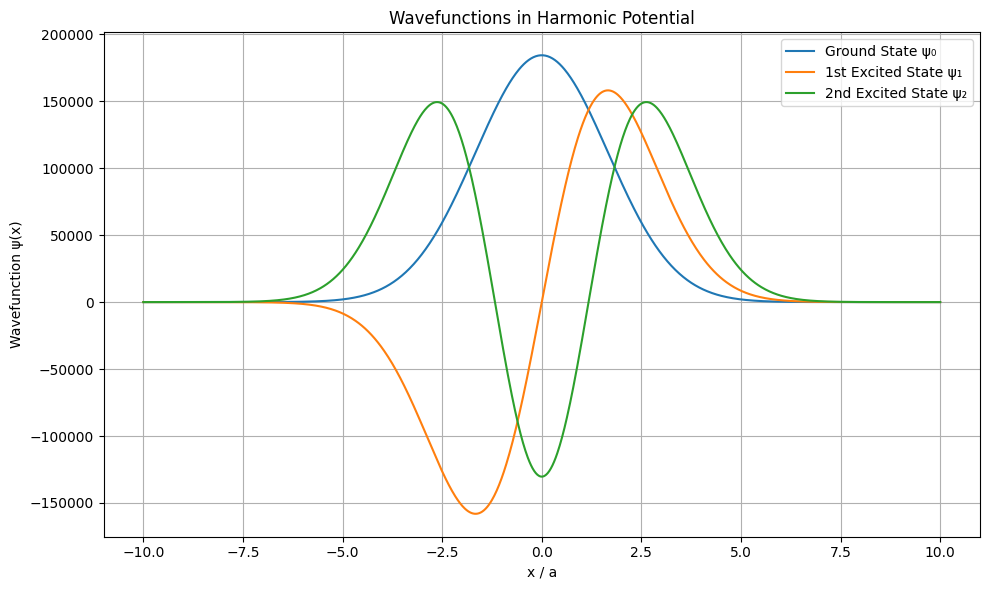

In [ ]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt

h_bar = 1.0545718e-34
m_e = 9.10938356e-31
V_0 = 50 * 1.60218e-19
a = 1e-11

x_lo = -10 * a
x_hi = 10 * a
points = 1000
x_vals = np.linspace(x_lo, x_hi, points)
dx_val = x_vals[1] - x_vals[0]

potential = V_0 * (x_vals**2 / a**2)

main_diag = (h_bar**2 / (m_e * dx_val**2)) + potential
off_diag = -h_bar**2 / (2 * m_e * dx_val**2) * np.ones(points - 1)

e_vals, e_vecs = eigh_tridiagonal(main_diag, off_diag)

J_to_eV = 1 / 1.60218e-19
energy_ev = e_vals * J_to_eV

E_ground = energy_ev[0]
E_first = energy_ev[1]
E_second = energy_ev[2]

print(f"Ground state energy: {E_ground:.4f} eV")
print(f"First excited state energy: {E_first:.4f} eV")
print(f"Second excited state energy: {E_second:.4f} eV")
print(f"Energy differences: ΔE₁ = {E_first - E_ground:.4f} eV, ΔE₂ = {E_second - E_first:.4f} eV")

psi0 = e_vecs[:, 0] / np.sqrt(np.trapz(e_vecs[:, 0]**2, x_vals))
psi1 = e_vecs[:, 1] / np.sqrt(np.trapz(e_vecs[:, 1]**2, x_vals))
psi2 = e_vecs[:, 2] / np.sqrt(np.trapz(e_vecs[:, 2]**2, x_vals))

plt.figure(figsize=(10, 6))
plt.plot(x_vals / a, psi0, label='Ground State ψ₀')
plt.plot(x_vals / a, psi1, label='1st Excited State ψ₁')
plt.plot(x_vals / a, psi2, label='2nd Excited State ψ₂')
plt.xlabel("x / a")
plt.ylabel("Wavefunction ψ(x)")
plt.title("Wavefunctions in Harmonic Potential")
plt.legend()
plt.tight_layout()
plt.show()


Exercise 7(c):

Ground state energy: 205.2969 eV
First excited state: 735.6386 eV
Second excited state: 1443.4185 eV
ΔE₁ = 530.3417 eV, ΔE₂ = 707.7800 eV


<ipython-input-13-b1529f491781>:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm0 = 2 * np.trapz(ψ0[:mid_index]**2, x_vals[:mid_index])
<ipython-input-13-b1529f491781>:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm1 = 2 * np.trapz(ψ1[:mid_index]**2, x_vals[:mid_index])
<ipython-input-13-b1529f491781>:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm2 = 2 * np.trapz(ψ2[:mid_index]**2, x_vals[:mid_index])


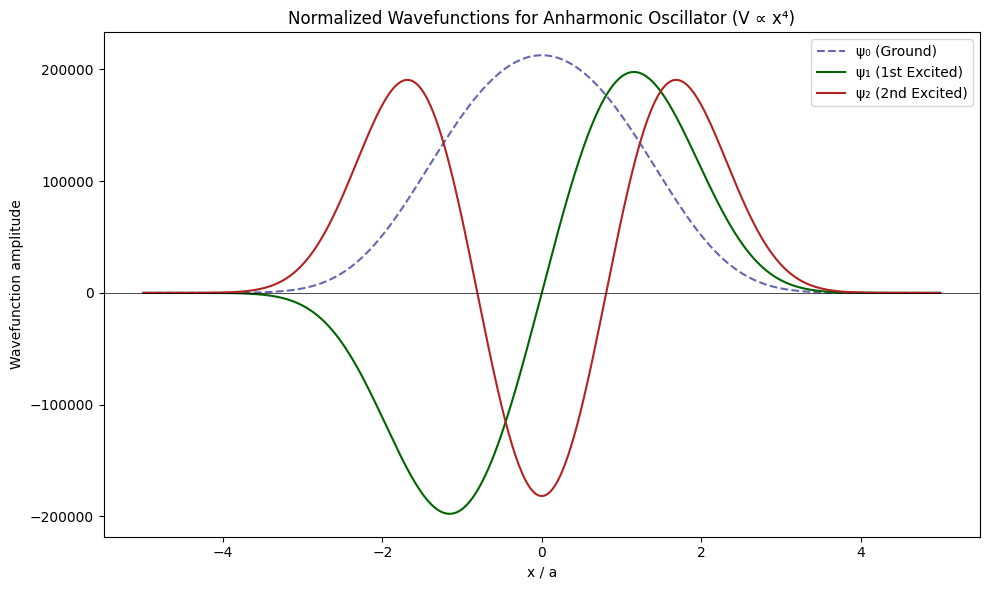

In [ ]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt

h_bar = 1.0545718e-34
m_e = 9.10938356e-31
V_0 = 50 * 1.60218e-19
a = 1e-11

x_lo = -10 * a
x_hi = 10 * a
points = 1000
x_vals = np.linspace(x_lo, x_hi, points)
dx_val = x_vals[1] - x_vals[0]

potential = V_0 * (x_vals**4 / a**4)

main_diag = (h_bar**2 / (m_e * dx_val**2)) + potential
off_diag = -h_bar**2 / (2 * m_e * dx_val**2) * np.ones(points - 1)

e_vals, e_vecs = eigh_tridiagonal(main_diag, off_diag)
energy_ev = e_vals / 1.60218e-19

E_ground, E_first, E_second = energy_ev[0], energy_ev[1], energy_ev[2]

print(f"Ground state energy: {E_ground:.4f} eV")
print(f"First excited state: {E_first:.4f} eV")
print(f"Second excited state: {E_second:.4f} eV")
print(f"ΔE₁ = {E_first - E_ground:.4f} eV, ΔE₂ = {E_second - E_first:.4f} eV")

mid_index = points // 2

ψ0 = e_vecs[:, 0]
ψ1 = e_vecs[:, 1]
ψ2 = e_vecs[:, 2]

norm0 = 2 * np.trapz(ψ0[:mid_index]**2, x_vals[:mid_index])
norm1 = 2 * np.trapz(ψ1[:mid_index]**2, x_vals[:mid_index])
norm2 = 2 * np.trapz(ψ2[:mid_index]**2, x_vals[:mid_index])

ψ0 = ψ0 / np.sqrt(norm0)
ψ1 = ψ1 / np.sqrt(norm1)
ψ2 = ψ2 / np.sqrt(norm2)

mask = (x_vals >= -5 * a) & (x_vals <= 5 * a)
x_plot = x_vals[mask] / a
ψ0_plot = ψ0[mask]
ψ1_plot = ψ1[mask]
ψ2_plot = ψ2[mask]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, ψ0_plot, label='ψ₀ (Ground)', color='navy', linestyle='--', alpha=0.6)
plt.plot(x_plot, ψ1_plot, label='ψ₁ (1st Excited)', color='darkgreen')
plt.plot(x_plot, ψ2_plot, label='ψ₂ (2nd Excited)', color='firebrick')
plt.xlabel("x / a")
plt.ylabel("Wavefunction amplitude")
plt.title("Normalized Wavefunctions for Anharmonic Oscillator (V ∝ x⁴)")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Exercise 8(a):

Three-Body Problem: Equations and Reduction to First-Order Form

Three stars are placed in the $xy$-plane, isolated in space and initially at rest. Their respective positions and masses (in arbitrary units) are provided as follows:

### Part (a): Equations of Motion

Let the position vectors of the stars be
\begin{equation}
( \vec{r}_1, \vec{r}_2, \vec{r}_3 ),
\end{equation}
with corresponding masses
\begin{equation}
( m_1, m_2, m_3).
\end{equation}

According to Newton’s law of gravitation, the force on Star 1 due to Star 2 is:
\begin{equation}
[
\vec{F}_{12} = G \frac{m_1 m_2}{|{\vec{r}_2 - \vec{r}_1}^3|} (\vec{r}_2 - \vec{r}_1)
]
\end{equation}
And the force on Star 1 due to Star 3 is:
\begin{equation}
[
\vec{F}_{13} = G \frac{m_1 m_3}{|{\vec{r}_3 - \vec{r}_1}^3|} (\vec{r}_3 - \vec{r}_1)
]
\end{equation}

The total gravitational force on Star 1 is therefore:
\begin{equation}
[
\vec{F}_1 = \vec{F}_{12} + \vec{F}_{13} = G \frac{m_1 m_2}{|{\vec{r}_2 - \vec{r}_1}^3|} (\vec{r}_2 - \vec{r}_1) + G \frac{m_1 m_3}{|{\vec{r}_3 - \vec{r}_1}^3|} (\vec{r}_3 - \vec{r}_1)
]
\end{equation}

Using Newton’s second law for Star 1:
\begin{equation}
[
m_1 \frac{d^2 \vec{r}_1}{dt^2} = \vec{F}_1
]
\end{equation}

Substituting the expression for the force:
\begin{equation}
[
m_1 \frac{d^2 \vec{r}_1}{dt^2} = G \frac{m_1 m_2}{|{\vec{r}_2 - \vec{r}_1}^3|} (\vec{r}_2 - \vec{r}_1) + G \frac{m_1 m_3}{|{|{r}_3 - \vec{r}_1}^3|} (\vec{r}_3 - \vec{r}_1)
]
\end{equation}

Dividing both sides by \( m_1 \) (assuming \( m_1 \neq 0 \)):
\begin{equation}
[
\frac{d^2 \vec{r}_1}{dt^2} = G m_2 \frac{\vec{r}_2 - \vec{r}_1}{|{\vec{r}_2 - \vec{r}_1}^3|} + G m_3 \frac{\vec{r}_3 - \vec{r}_1}{|{\vec{r}_3 - \vec{r}_1}^3|}
]
\end{equation}

Final form of the motion equation for Star 1:
\begin{align*}
[
\frac{d^2 \vec{r}_1}{dt^2} = G m_2 \frac{\vec{r}_2 - \vec{r}_1}{|\vec{r}_2 - \vec{r}_1|^3} + G m_3 \frac{\vec{r}_3 - \vec{r}_1}{|\vec{r}_3 - \vec{r}_1|^3}
]
\end{align*}

By symmetry, the motion equations for the other two stars are:
\begin{align*}
[
\frac{d^2 \vec{r}_2}{dt^2} = G m_1 \frac{\vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3} + G m_3 \frac{\vec{r}_3 - \vec{r}_2}{|\vec{r}_3 - \vec{r}_2|^3}
]
\end{align*}
\begin{align*}
[
\frac{d^2 \vec{r}_3}{dt^2} = G m_1 \frac{\vec{r}_1 - \vec{r}_3}{|\vec{r}_1 - \vec{r}_3|^3} + G m_2 \frac{\vec{r}_2 - \vec{r}_3}{|\vec{r}_2 - \vec{r}_3|^3}
]
\end{align*}

### Part (b): First-Order System Conversion

Introduce the velocity vectors as follows:
\begin{align*}
[
\vec{v}_1 = \frac{d\vec{r}_1}{dt}, \quad \vec{v}_2 = \frac{d\vec{r}_2}{dt}, \quad \vec{v}_3 = \frac{d\vec{r}_3}{dt}
]
\end{align*}

The second-order equations are now written as six first-order vector equations:
\begin{align*}
\frac{d\vec{r}_1}{dt} &= \vec{v}_1 \\
\frac{d\vec{v}_1}{dt} &= G m_2 \frac{\vec{r}_2 - \vec{r}_1}{|\vec{r}_2 - \vec{r}_1|^3} + G m_3 \frac{\vec{r}_3 - \vec{r}_1}{|\vec{r}_3 - \vec{r}_1|^3} \\
\frac{d\vec{r}_2}{dt} &= \vec{v}_2 \\
\frac{d\vec{v}_2}{dt} &= G m_1 \frac{\vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3} + G m_3 \frac{\vec{r}_3 - \vec{r}_2}{|\vec{r}_3 - \vec{r}_2|^3} \\
\frac{d\vec{r}_3}{dt} &= \vec{v}_3 \\
\frac{d\vec{v}_3}{dt} &= G m_1 \frac{\vec{r}_1 - \vec{r}_3}{|\vec{r}_1 - \vec{r}_3|^3} + G m_2 \frac{\vec{r}_2 - \vec{r}_3}{|\vec{r}_2 - \vec{r}_3|^3}
\end{align*}

Each vector equation includes two scalar components for the \(x\) and \(y\) directions, totaling 12 scalar first-order equations.

### Part (c): State Vector Formulation

Define a single state vector combining all positions and velocities:
\begin{align*}
[
\vec{y} =
\begin{bmatrix}
x_1 \\ y_1 \\ x_2 \\ y_2 \\ x_3 \\ y_3 \\
v_{1x} \\ v_{1y} \\ v_{2x} \\ v_{2y} \\ v_{3x} \\ v_{3y}
\end{bmatrix}
]
\end{align*}

Then the time derivative of this state vector is:
\begin{align*}
[
\frac{d\vec{y}}{dt} =
\begin{bmatrix}
v_{1x} \\ v_{1y} \\ v_{2x} \\ v_{2y} \\ v_{3x} \\ v_{3y} \\
a_{1x} \\ a_{1y} \\ a_{2x} \\ a_{2y} \\ a_{3x} \\ a_{3y}
\end{bmatrix}
]
\end{align*}

Here, the acceleration components \( a_{ix}, a_{iy} \) are calculated based on gravitational interactions between the stars using Newton’s law.

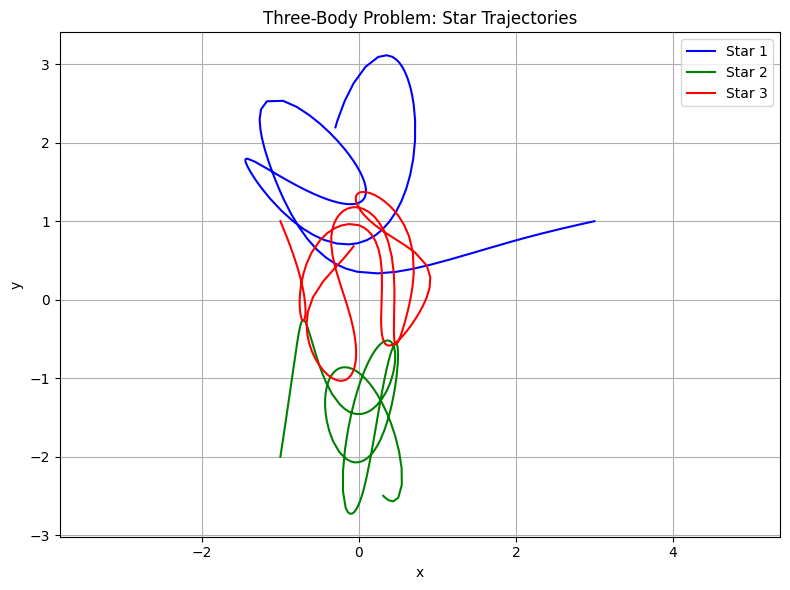

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

masses = np.array([150.0, 200.0, 250.0])
G = 1.0

positions = np.array([3.0, 1.0, -1.0, -2.0, -1.0, 1.0])
velocities = np.zeros(6)
state0 = np.concatenate((positions, velocities))

def derivatives(state):
    r = state[:6].reshape(3, 2)
    v = state[6:].reshape(3, 2)
    a = np.zeros((3, 2))
    for i in range(3):
        for j in range(3):
            if i != j:
                diff = r[j] - r[i]
                dist3 = np.linalg.norm(diff)**3 + 1e-10
                a[i] += G * masses[j] * diff / dist3
    return np.concatenate((v.flatten(), a.flatten()))

def rk4_adaptive(f, y0, t0, t1, dt_init, tol):
    t = t0
    y = y0.copy()
    dt = dt_init
    T, Y = [t], [y.copy()]
    while t < t1:
        if t + dt > t1:
            dt = t1 - t

        k1 = f(y)
        k2 = f(y + 0.5 * dt * k1)
        k3 = f(y + 0.5 * dt * k2)
        k4 = f(y + dt * k3)
        y_big = y + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

        dt_half = 0.5 * dt
        k1 = f(y)
        k2 = f(y + 0.5 * dt_half * k1)
        k3 = f(y + 0.5 * dt_half * k2)
        k4 = f(y + dt_half * k3)
        y_half = y + dt_half * (k1 + 2*k2 + 2*k3 + k4) / 6

        k1 = f(y_half)
        k2 = f(y_half + 0.5 * dt_half * k1)
        k3 = f(y_half + 0.5 * dt_half * k2)
        k4 = f(y_half + dt_half * k3)
        y_small = y_half + dt_half * (k1 + 2*k2 + 2*k3 + k4) / 6

        error = np.max(np.abs(y_big - y_small))

        if error < tol:
            t += dt
            y = y_small
            T.append(t)
            Y.append(y.copy())
            dt *= min(2, (tol / error)**0.25)
        else:
            dt *= max(0.1, (tol / error)**0.25)

    return np.array(T), np.array(Y)

t0, t1 = 0, 2
tol = 1e-3
dt_init = 1e-3
T, Y = rk4_adaptive(derivatives, state0, t0, t1, dt_init, tol)

x1, y1 = Y[:, 0], Y[:, 1]
x2, y2 = Y[:, 2], Y[:, 3]
x3, y3 = Y[:, 4], Y[:, 5]

plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Star 1', color='blue')
plt.plot(x2, y2, label='Star 2', color='green')
plt.plot(x3, y3, label='Star 3', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three-Body Problem: Star Trajectories')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
